#Aprendizaje Automático - Trabajo práctico N°2
##Grupo N°3: A Automatizar con FFJ


#1) Carga de librerías

In [ ]:
import pandas as pd
import numpy as np
import math
import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
import keras
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import tensorflow.keras.layers as tfkl
from tensorflow.keras.datasets import fashion_mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

#2) Carga de datos

Se cargan los datos de indumentaria del módulo de keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ["remera", "pantalón", "buzo", "vestido", "campera" ,"sandalia", "camisa", "zapatilla", "cartera", "bota"]

Se observan ejemplos de las imágenes de indumentaria a clasificar.

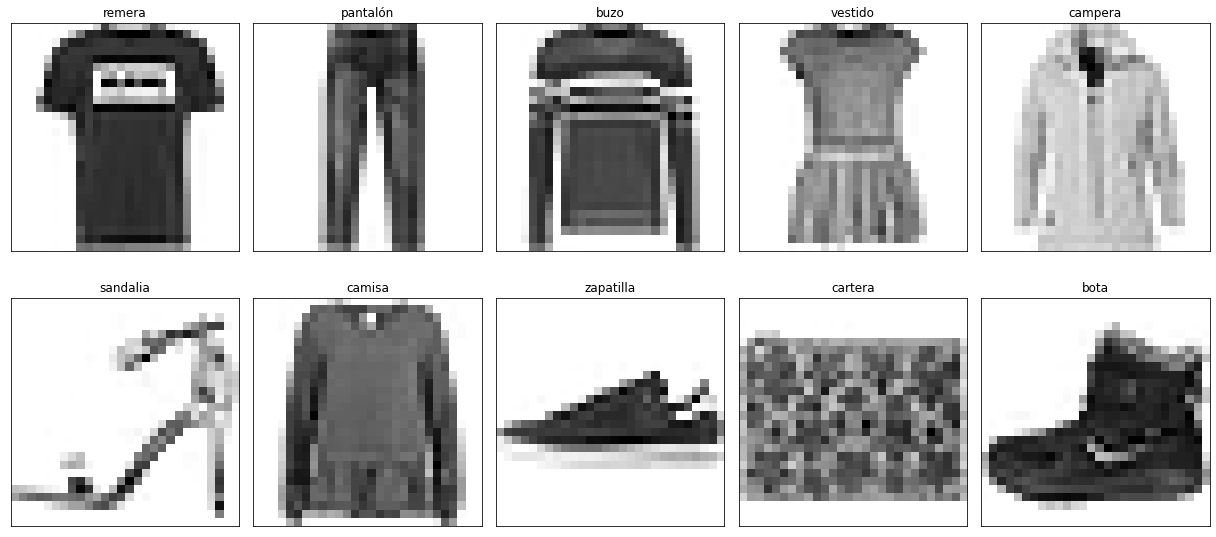

In [ ]:
plt.figure(figsize=(17,8))
for i,label_val in enumerate(np.unique(train_labels)):
  label_idxs = np.argwhere(train_labels == label_val)
  plt.subplot(2,5,i+1)
  plt.title(class_names[label_val])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(train_images[label_idxs[0]]),cmap='binary')
plt.tight_layout()

Se revisan las dimensiones de las matrices.

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Cada categoría se encuentra balanceada.

In [ ]:
print(np.histogram(train_labels, bins=[0, 1, 2, 3,4,5,6,7,8,9,10]))
print(np.histogram(test_labels, bins=[0, 1, 2, 3,4,5,6,7,8,9,10]))

(array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))
(array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


Se cambia el formato de matriz a dataframe para facilitar su posterior manipulación.

In [ ]:
train_labels = pd.DataFrame(train_labels)
test_labels = pd.DataFrame(test_labels)

Se divide el conjunto de desarrollo en entrenamiento (80%) y validación (20%).

In [ ]:
train_images,val_images,train_labels,val_labels = train_test_split(train_images,train_labels,test_size=0.2, random_state = 42)

Se verifica la división en cada subconjunto.

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(val_images.shape)
print(val_labels.shape)

(48000, 28, 28)
(48000, 1)
(12000, 28, 28)
(12000, 1)


Se cambia la dimensionalidad de los conjuntos de datos pasando de n filasx28x28 a n filasx784.

In [ ]:
train_images = train_images.reshape((train_images.shape[0],784)).astype(int)
val_images = val_images.reshape((val_images.shape[0],784)).astype(int)
test_images = test_images.reshape((test_images.shape[0],784)).astype(int)
print(train_images.shape, val_images.shape,test_images.shape)

(48000, 784) (12000, 784) (10000, 784)


###Prueba Modelo 1: Bagging - Random Forest

In [ ]:
rf = RandomForestClassifier()
scores_rf_bf = []
rf.fit(train_images, train_labels)
preds = rf.predict(val_images)
scores_rf_bf.append(accuracy_score(val_labels, preds).round(3))
scores_rf_bf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.881]

In [ ]:
map={
    0:'t',
    1:'e',
    2:'v',
    3:'j',
    4:'p',
    5:'d',
    6:'w',
    7:'h',
    8:'i',
    9:'q'
}

In [ ]:
train_labels[0]=train_labels[0].map(map)
val_labels[0]=val_labels[0].map(map)
test_labels[0]=test_labels[0].map(map)

#3) Entrenamiento de modelos con parámetros predeterminados

Se entrenan 4 modelos con distintos algoritmos e hiperparámetros predeterminados (tal como se encuentran en la librería Scikit-Learn) utilizando los datos de desarrollo previamente divididos en entrenamiento y validación.
Debido a que interesa conocer qué tan acertado es cada modelo al clasificar si una imagen corresponde o no a una determinada categoría, la métrica seleccionada es la eficacia ("accuracy").

###Modelo 1: Bagging - Random Forest

In [ ]:
rf = RandomForestClassifier()
scores_rf = []
rf.fit(train_images, train_labels)
preds = rf.predict(val_images)
scores_rf.append(accuracy_score(val_labels, preds).round(3))
scores_rf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0.881]

###Modelo 2: Boosting - Gradient boosting (GBM)

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=5, max_depth=1)
scores_gbc = []
gbc.fit(train_images, train_labels)
preds = gbc.predict(val_images)
scores_gbc.append(accuracy_score(val_labels, preds).round(3))
scores_gbc

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.621]

###Modelo 3: Naive bayes

In [ ]:
nb = MultinomialNB()
scores_nb = []
nb.fit(train_images, train_labels)
preds = nb.predict(val_images)
scores_nb.append(accuracy_score(val_labels, preds).round(3))
scores_nb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.664]

###Modelo 4: Arbol de decisión

In [ ]:
dtc = DecisionTreeClassifier()
scores_dtc = []
dtc.fit(train_images, train_labels)
preds = dtc.predict(val_images)
scores_dtc.append(accuracy_score(val_labels, preds).round(3))
scores_dtc

[0.797]

###Modelo 5: XGBoost

In [ ]:
xg = XGBClassifier()
scores_xg=[]
xg.fit(train_images, train_labels)
preds_xg = xg.predict(val_images)
scores_xg.append(accuracy_score(val_labels, preds_xg).round(3))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
scores_xg

[0.862]

#4) Optimización de Modelo 1: Random Forest

Se prepara un modelo con algoritmo de random forest con optimización de parámetros.

Además del dataframe para guardar los scores, se crea un df para almacenar el tiempo de ajuste de cada modelo.

In [ ]:
scores_rf2 = []
scores_rf2_train = []
scores_rf3= []
scores_rf3_train= []
tiempo = []
n_est = [1,50,100,150,200]
max_d = [1,3,5,7,9,11]

Inicialmente, se trabaja con el hiperparámetro "n estimators". El valor por default de este parámetro es 100, por lo que se prueba con mayores valores.

In [ ]:
for e in n_est:
    print(e)
    rf2 = RandomForestClassifier(n_estimators=e)
    start = time.time()
    # # Preprocessing of training data, fit model
    rf2.fit(train_images, train_labels)
    stop = time.time()
    tiempo.append(round(stop-start,3))
    preds = rf2.predict(val_images)
    preds_train = rf2.predict(train_images)
    scores_rf2.append(accuracy_score(val_labels, preds).round(3))
    scores_rf2_train.append(accuracy_score(train_labels, preds_train).round(3))


1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


150


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Luego, se juntan todos los scores y los tiempos de ajuste en un dataframe y se suman las columnas de n estimadores.

In [ ]:
res_rf2 = pd.DataFrame({'Tiempo de ajuste': tiempo, 'Rendimiento': scores_rf2, 'n estimators': n_est, "Rendimiento_train": scores_rf2_train})

Se grafica el rendimiento de los modelos en función de la cantidad de árboles y del tiempo de ajuste.

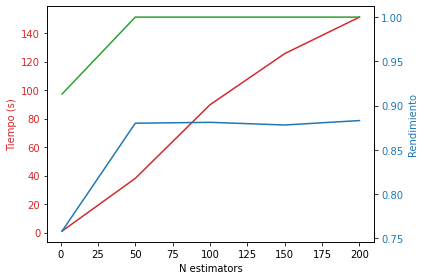

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('N estimators')
ax1.set_ylabel('Tiempo (s)', color=color)
ax1.plot(res_rf2['n estimators'], res_rf2['Tiempo de ajuste'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rendimiento', color=color)  # we already handled the x-label with ax1
ax2.plot(res_rf2['n estimators'], res_rf2['Rendimiento'], color=color)
ax2.plot(res_rf2['n estimators'], res_rf2['Rendimiento_train'], color="tab:green")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Se selecciona el valor del hiperparámetro que mejores resultados genera en el modelo: 100 n estimators

A continuación, se explora el hiperparámetro "max depth", el cual por default, no se encuentra limitado, es decir, cada arbol se extiende hasta que todas las hojas sean puras o bien, hasta que se alcanza el valor mínimo de muestras para dividir un nodo.

In [ ]:
tiempo=[]

In [ ]:
for e in max_d:
    print(e)
    rf3 = RandomForestClassifier(n_estimators=100, max_depth=e)
    start = time.time()
    # # Preprocessing of training data, fit model
    rf3.fit(train_images, train_labels)
    stop = time.time()
    tiempo.append(round(stop-start,3))
    preds = rf3.predict(val_images)
    preds_train = rf3.predict(train_images)
    scores_rf3.append(accuracy_score(val_labels, preds).round(3))
    scores_rf3_train.append(accuracy_score(train_labels, preds_train).round(3))

1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
res_rf3 = pd.DataFrame({'Tiempo de ajuste': tiempo, 'Rendimiento': scores_rf3, 'Máxima profundidad': max_d, "Rendimiento_train": scores_rf3_train})

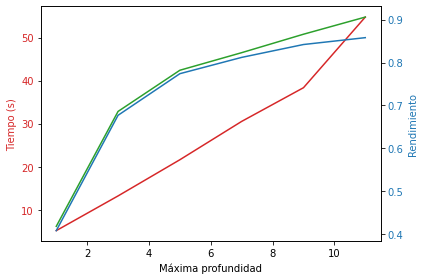

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Máxima profundidad')
ax1.set_ylabel('Tiempo (s)', color=color)
ax1.plot(res_rf3['Máxima profundidad'], res_rf3['Tiempo de ajuste'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rendimiento', color=color)  # we already handled the x-label with ax1
ax2.plot(res_rf3["Máxima profundidad"], res_rf3['Rendimiento'], color=color)
ax2.plot(res_rf3['Máxima profundidad'], res_rf3['Rendimiento_train'], color="tab:green")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Además del dataframe para guardar los scores, se crea un df para almacenar el tiempo de ajuste de cada modelo.

Luego, se juntan todos los scores y los tiempos de ajuste en un dataframe y se suman las columnas de n estimadores y de las correspondientes etiquetas.

Se grafica el rendimiento de los modelos en función de la cantidad de árboles y del tiempo de ajuste.

#5) Optimización de Modelo 2: Gradient Boosting

Se prepara un modelo con un algoritmo de boosting con optimización de parámetros.

Además del dataframe para guardar los scores, se crea un df para almacenar el tiempo de ajuste de cada modelo.

In [ ]:
scores_gbc2 = []
scores_gbc2_train = []
scores_gbc3= []
scores_gbc3_train= []
tiempo = []
n_est = [1,3,5]
max_d = [1,3,5]

Inicialmente, se trabaja con el hiperparámetro "n estimators". El valor por default de este parámetro es 100, por lo que se prueba con mayores valores.

In [ ]:
for e in n_est:
    print(e)
    gbc2 = GradientBoostingClassifier(n_estimators=e, max_depth = 1)
    start = time.time()
    # # Preprocessing of training data, fit model
    gbc2.fit(train_images, train_labels)
    stop = time.time()
    tiempo.append(round(stop-start,3))
    preds = gbc2.predict(val_images)
    preds_train = gbc2.predict(train_images)
    scores_gbc2.append(accuracy_score(val_labels, preds).round(3))
    scores_gbc2_train.append(accuracy_score(train_labels, preds_train).round(3))


1


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
res_gbc2 = pd.DataFrame({'Tiempo de ajuste': tiempo, 'Rendimiento': scores_gbc2, 'n estimators': n_est, "Rendimiento_train":scores_gbc2_train })

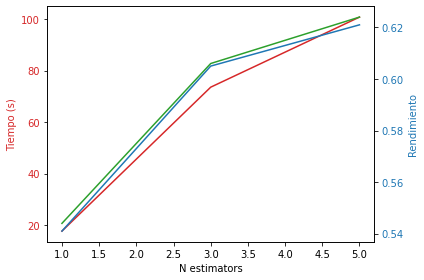

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('N estimators')
ax1.set_ylabel('Tiempo (s)', color=color)
ax1.plot(res_gbc2['n estimators'], res_gbc2['Tiempo de ajuste'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rendimiento', color=color)  # we already handled the x-label with ax1
ax2.plot(res_gbc2['n estimators'], res_gbc2['Rendimiento'], color=color)
ax2.plot(res_gbc2['n estimators'], res_gbc2['Rendimiento_train'], color="tab:green")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

A continuación, se explora el hiperparámetro "max depth", el cual por default, tiene un valor de 3.

In [ ]:
tiempo=[]

In [ ]:
for e in max_d:
    print(e)
    gbc3 = GradientBoostingClassifier(n_estimators= 5 , max_depth=e)
    start = time.time()
    # # Preprocessing of training data, fit model
    gbc3.fit(train_images, train_labels)
    stop = time.time()
    tiempo.append(round(stop-start,3))
    preds = gbc3.predict(val_images)
    preds_train = gbc3.predict(train_images)
    scores_gbc3.append(accuracy_score(val_labels, preds).round(3))
    scores_gbc3_train.append(accuracy_score(train_labels, preds_train).round(3))


1


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
res_gbc3 = pd.DataFrame({'Tiempo de ajuste': tiempo, 'Rendimiento': scores_gbc3, 'Máxima profundidad': max_d, "Rendimiento_train":scores_gbc3_train})

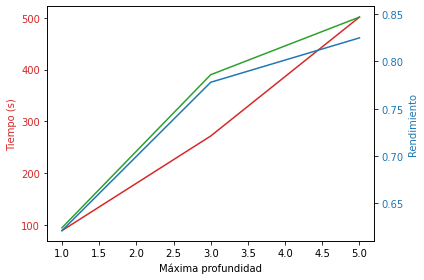

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Máxima profundidad')
ax1.set_ylabel('Tiempo (s)', color=color)
ax1.plot(res_gbc3['Máxima profundidad'], res_gbc3['Tiempo de ajuste'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rendimiento', color=color)  # we already handled the x-label with ax1
ax2.plot(res_gbc3['Máxima profundidad'], res_gbc3['Rendimiento'], color=color)
ax2.plot(res_gbc3['Máxima profundidad'], res_gbc3['Rendimiento_train'], color="tab:green")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#6) Predicción con el conjunto de testeo

In [ ]:
print(type(train_images))
print(type(val_images))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
train_images = pd.DataFrame(train_images)
val_images = pd.DataFrame(val_images)

In [ ]:
#juntar val y train
train_images= pd.concat([train_images, val_images]) 
train_labels= pd.concat([train_labels, val_labels]) 

In [ ]:
scores=[]
modelo = ["random forest", "gradient boosting","naive bayes" , "arboles decision"]

#mejor modelo de random forest
rf4 = RandomForestClassifier(n_estimators=50, max_depth=9)
rf4.fit(train_images, train_labels)
preds_rf4 = rf4.predict(test_images)
scores.append(accuracy_score(test_labels, preds_rf4).round(3))

#mejor modelo de gradient boosting
gbc4 = GradientBoostingClassifier(n_estimators= 5 , max_depth= 5)
gbc4.fit(train_images, train_labels)
preds_gbc4 = gbc4.predict(test_images)
scores.append(accuracy_score(test_labels, preds_gbc4).round(3))

# naive bayes
nb = MultinomialNB()
nb.fit(train_images, train_labels)
preds_nb = nb.predict(test_images)
scores.append(accuracy_score(test_labels, preds_nb).round(3))

#arboles decision
dtc = DecisionTreeClassifier()
dtc.fit(train_images, train_labels)
preds_dtc = dtc.predict(test_images)
scores.append(accuracy_score(test_labels, preds_dtc).round(3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
scores

[0.836, 0.818, 0.655, 0.789]

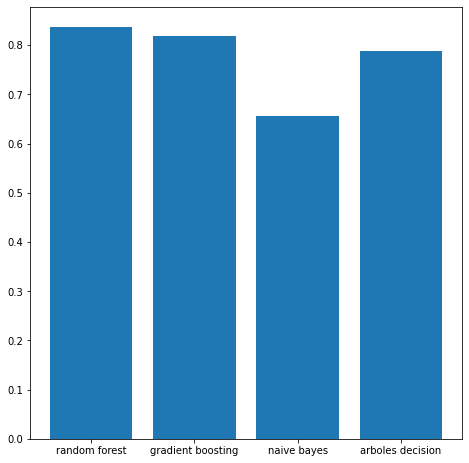

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(modelo,scores)
plt.show()

Matriz de confusión del mejor modelo

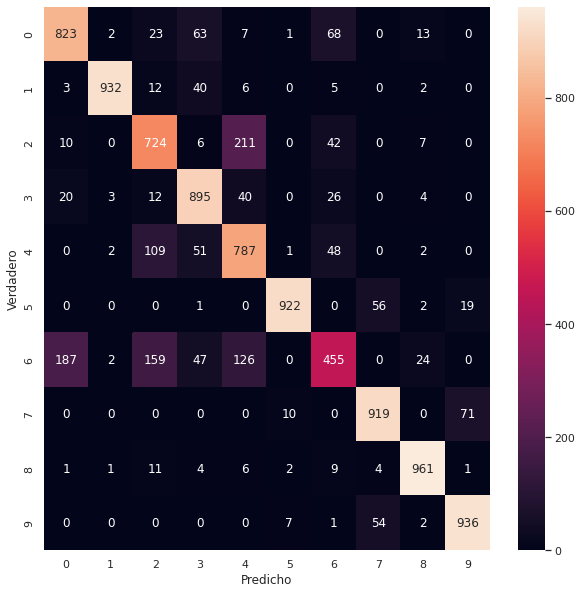

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(confusion_matrix(test_labels,preds_rf4),annot=True,fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero');

#7) Prueba de robustez

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ["remera", "pantalón", "buzo", "vestido", "campera" ,"sandalia", "camisa", "zapatilla", "cartera", "bota"]

In [ ]:
train_labels = pd.DataFrame(train_labels)
test_labels = pd.DataFrame(test_labels)

In [ ]:
# X_train_90 dataset will contain images rotated by 90 degrees
test_90=np.rot90(test_images, axes=(1,2))
train_90 = np.rot90(train_images, axes= (1,2))

In [ ]:
train_images = train_images.reshape((train_images.shape[0],784)).astype(int)
test_90 = test_90.reshape((test_90.shape[0],784)).astype(int)
test_images= test_images.reshape((test_images.shape[0],784)).astype(int)
train_90 = train_90.reshape((train_90.shape[0],784)).astype(int)

In [ ]:
#mejor modelo de random forest
rf4 = RandomForestClassifier(n_estimators=50, max_depth=9)
rf4.fit(train_images, train_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=9, n_estimators=50)

In [ ]:
scores=[]
preds_rf4 = rf4.predict(test_90)
scores.append(accuracy_score(test_labels, preds_rf4).round(3))

In [ ]:
#entrenamos el mejor modelo de random forest con el train rotado
rf_90 = RandomForestClassifier(n_estimators=50, max_depth=9)
rf_90.fit(train_90, train_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=9, n_estimators=50)

In [ ]:
preds_rf_90 = rf_90.predict(test_90)
scores.append(accuracy_score(test_labels, preds_rf_90).round(3))

In [ ]:
#scores el primero es entrenando con imagenes sin rotar y el segundo score con las imagenes rotadas
scores

[0.054, 0.834]

In [ ]:
train_total= pd.concat([pd.DataFrame(train_90), pd.DataFrame(train_images)])
train_labels_total = pd.concat([train_labels, train_labels])
test_total= pd.concat([pd.DataFrame(test_90), pd.DataFrame(test_images)])
test_labels_total = pd.concat([test_labels, test_labels])

In [ ]:
rf_90 = RandomForestClassifier(n_estimators=50, max_depth=9)
rf_90.fit(train_total, train_labels_total)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=9, n_estimators=50)

In [ ]:
preds_rf_90 = rf_90.predict(test_total)
scores.append(accuracy_score(test_labels_total, preds_rf_90).round(3))

In [ ]:
scores

[0.054, 0.834, 0.798]